In [4]:
# 引包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [8]:
# numpy 构建单位矩阵
# np.identity(7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

Text(0, 0.5, 'Profit in $10,000s')

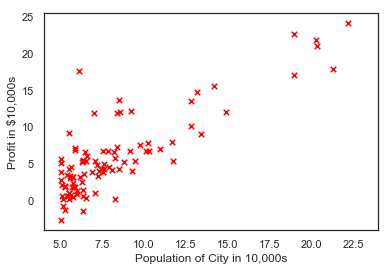

In [9]:
# 读取数据，条件属性和决策属性分离，并进行可视化
data = np.loadtxt('linear_regression_data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [19]:
# 计算损失函数
def compute_Loss(X, y, theta=[[0], [0]]):
    m = y.size
    loss = 0
    h = X.dot(theta)
    loss = 1.0 / (2 * m) * np.sum(np.square(h - y))
    return loss


compute_Loss(X, y)

32.072733877455676

In [20]:
# 计算损失函数
def compute_Loss(X, y, theta=[[0], [0]]):
    m = y.size
    h = X.dot(theta)
    loss = 1.0 / (2 * m) * np.sum(np.square(h - y))
    return loss


# 梯度下降
def gradient_Descent(X, y, theta=[[0], [0]], learning_rate=0.001, num_iters=2000):
    m = y.size
    loss_his = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        h = np.dot(X, theta)
        gradient_theta = learning_rate * (1.0 / m) * (np.sum((h - y) * X, axis=0))
        gradient_theta = gradient_theta[:, np.newaxis]
        theta = theta - gradient_theta
        loss_his[iter] = compute_Loss(X, y, theta)
    return theta, loss_his

In [21]:
# 手写线性回归
theta = np.random.randn(2, 1)
theta_now, loss_his = gradient_Descent(X, y, theta=theta, num_iters=2000)
xx = np.arange(5, 23)
yy = theta_now[0] + theta_now[1] * xx

# sklearn 中线性回归
regr = LinearRegression()
regr.fit(X[:, 1].reshape(-1, 1), y.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Profit in $10,000s')

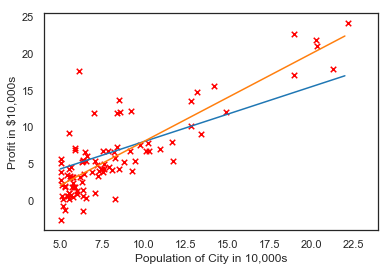

In [22]:
# 两次线性回归对比
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, yy, label='own linear regression')
plt.plot(xx, regr.intercept_ + regr.coef_ * xx, label='sklearn linear regression')
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')